In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(r'C:\Users\asimanca\Documents\GitHub\Data_science_salary\data\ds_salaries.csv')

### pre prosesamiento

In [10]:
df.head(3) #saber columnas

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [11]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [13]:
df.shape #saber dimensiones

(3755, 11)

In [14]:
df.dtypes #saber tipos de datos object es un string

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [15]:
df.isnull().sum() #no confiarse de los datos que hemos recibido siempre hacer un isnull

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [18]:
df.duplicated().sum() #saber valores duplicados no un dato sino una fila entera, pudiese ser un error de exportacion

1171

In [19]:
duplicados=pd.DataFrame(df.value_counts())
duplicados[duplicados['count']>1]

count
work_year experience_level employment_type job_title            salary salary_currency salary_in_usd employee_residence remote_ratio company_location company_size       
2022      SE               FT              Data Scientist       191475 USD             191475        US                 100          US               M                21
                                                                141525 USD             141525        US                 100          US               M                21
2023      SE               FT              Data Engineer        252000 USD             252000        US                 0            US               M                13
                                                                129000 USD             129000        US                 0            US               M                13
2022      SE               FT              Data Engineer        130000 USD             130000        US                 0            US               M                12
...                                                                                                                                                                   ...
                                           Data Scientist       119300 USD             119300        US                 0            US               L                 2
2023      SE               FT              Data Quality Analyst 100000 USD             100000        US                 0            US               M                 2
                                                                80000  USD             80000         US                 0            US               M                 2
2022      EN               FT              Data Analyst         50000  USD             50000         US                 50           US               L                 2
2023      MI               FT              Data Analyst         85000  USD             85000         US                 0            US               M                 2

[544 rows x 1 columns]

In [28]:
df[['work_year','experience_level','employment_type','job_title','salary','salary_currency','salary_in_usd','employee_residence','remote_ratio','company_location','company_size']].value_counts()

work_year  experience_level  employment_type  job_title           salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
2022       SE                FT               Data Scientist      191475  USD              191475         US                  100           US                M               21
                                                                  141525  USD              141525         US                  100           US                M               21
2023       SE                FT               Data Engineer       252000  USD              252000         US                  0             US                M               13
                                                                  129000  USD              129000         US                  0             US                M               13
2022       SE                FT               Data Engineer       130000  USD              130000         US             

In [32]:
def mas_duplicados(df):
    df_duplicados = df[df.duplicated(keep=False)]
    df_agrupados = df_duplicados.groupby(df.columns.tolist()).size().reset_index().rename(columns={0: 'count'})
    df_ordenados = df_agrupados.sort_values(by='count', ascending=False)
    return df_ordenados

mas_duplicados(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,count
223,2022,SE,FT,Data Scientist,191475,USD,191475,US,100,US,M,21
201,2022,SE,FT,Data Scientist,141525,USD,141525,US,100,US,M,21
441,2023,SE,FT,Data Engineer,252000,USD,252000,US,0,US,M,13
399,2023,SE,FT,Data Engineer,129000,USD,129000,US,0,US,M,13
221,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M,12
...,...,...,...,...,...,...,...,...,...,...,...,...
229,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M,2
226,2022,SE,FT,Data Scientist,207000,USD,207000,US,100,US,M,2
225,2022,SE,FT,Data Scientist,203500,USD,203500,US,0,US,M,2
224,2022,SE,FT,Data Scientist,198440,USD,198440,US,0,US,L,2


In [34]:
df.drop_duplicates(inplace=True) #elimina los duplicados

In [35]:
df.shape

(2584, 11)

### EDA exploratore data analysis

In [63]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


¿De qué país son la mayoria de compañias?

¿En qué puesto se gana mas?

Tipo de trabajo, pais de residencia donde mas se cobra

In [64]:
salario_promedio = df.groupby('job_title')['salary'].mean()
salario_promedio_orden = salario_promedio.sort_values(ascending=False)
salario_promedio_orden.head(3)


job_title
Head of Machine Learning          6.000000e+06
Principal Data Architect          3.000000e+06
Lead Machine Learning Engineer    2.548667e+06
Name: salary, dtype: float64

El nivel de experiencia es proporcional al trabajo?

Cuanto se cobra de media por cada nivel de experiencia

En que compañia se trabaja mas

por que porcentaje promedio se aumenta el salario entre nivel de experiencia

En que pasi se cobra mas por tipo de empleo

#pd.set_option('display.max_rows', None) verlos datos

In [62]:
df.groupby(['company_location','job_title']).agg({'salary_in_usd':'max'}).round(2).sort_values(by=['salary_in_usd','company_location'],ascending=False)

salary_in_usd
company_location job_title                                              
US               Research Scientist                               450000
GB               Data Analyst                                     430967
IL               AI Scientist                                     423834
US               Applied Machine Learning Scientist               423000
                 Principal Data Scientist                         416000
                 Data Scientist                                   412000
                 Data Analytics Lead                              405000
                 Data Analyst                                     385000
                 Applied Data Scientist                           380000
                 Data Architect                                   376080
                 Data Science Tech Lead                           375000
                 Machine Learning Software Engineer               375000
                 Director of Data Science                         353200
                 Applied Scientist                                350000
                 Computer Vision Engineer                         342810
                 Machine Learning Engineer                        342300
                 Head of Data                                     329500
                 Data Engineer                                    324000
                 Head of Data Science                             314100
                 Data Science Manager                             300000
IN               AI Developer                                     300000
US               Research Engineer                                293000
                 Analytics Engineer                               289800
                 ML Engineer                                      289076
                 Lead Data Engineer                               276000
                 NLP Engineer                                     275000
DE               Machine Learning Engineer                        275000
                 Research Engineer                                275000
CA               AI Developer                                     275000
                 Machine Learning Engineer                        269000
JP               Machine Learning Scientist                       260000
CA               ML Engineer                                      260000
                 Data Scientist                                   258000
MX               Machine Learning Engineer                        255000
ES               Research Scientist                               253750
US               Cloud Data Architect                             250000
                 ETL Developer                                    250000
CA               Machine Learning Software Engineer               248400
                 Research Scientist                               248100
US               Data Science Lead                                247500
                 Machine Learning Scientist                       230000
RU               Head of Data                                     230000
GB               Analytics Engineer                               230000
US               Business Intelligence Engineer                   225000
                 Data Lead                                        225000
CA               Machine Learning Scientist                       225000
US               Data Specialist                                  221300
DE               AI Developer                                     214618
US               Machine Learning Infrastructure Engineer         205920
                 Data Analytics Manager                           204500
                 AI Developer                                     200000
                 AI Scientist                                     200000
                 Machine Learning Manager                         200000
                 Principal Data Engineer    

Wich are experience level more required

Cuales se repiten mas en este set de datos, empresas medianas, grandes o pequeñas?

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='experience_level'>

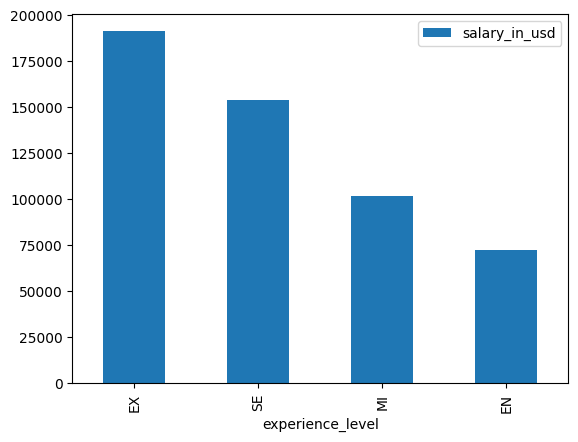

In [39]:
#uso de graficas

df.groupby(['experience_level']).agg({'salary_in_usd': 'mean'}).round(2).sort_values(by='salary_in_usd', ascending=False).plot(kind='bar')